In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/main/decision-tree/winequality-merged.csv'
arquivo = pd.read_csv(url)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [ ]:
# Informações gerais sobre o dataset
print(arquivo.info())

# Descrição estatística das variáveis numéricas
print(arquivo.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
       fixed acidity  volatile acidity  citric acid  resid

In [ ]:
print(arquivo['color'].value_counts())

white    4898
red      1599
Name: color, dtype: int64


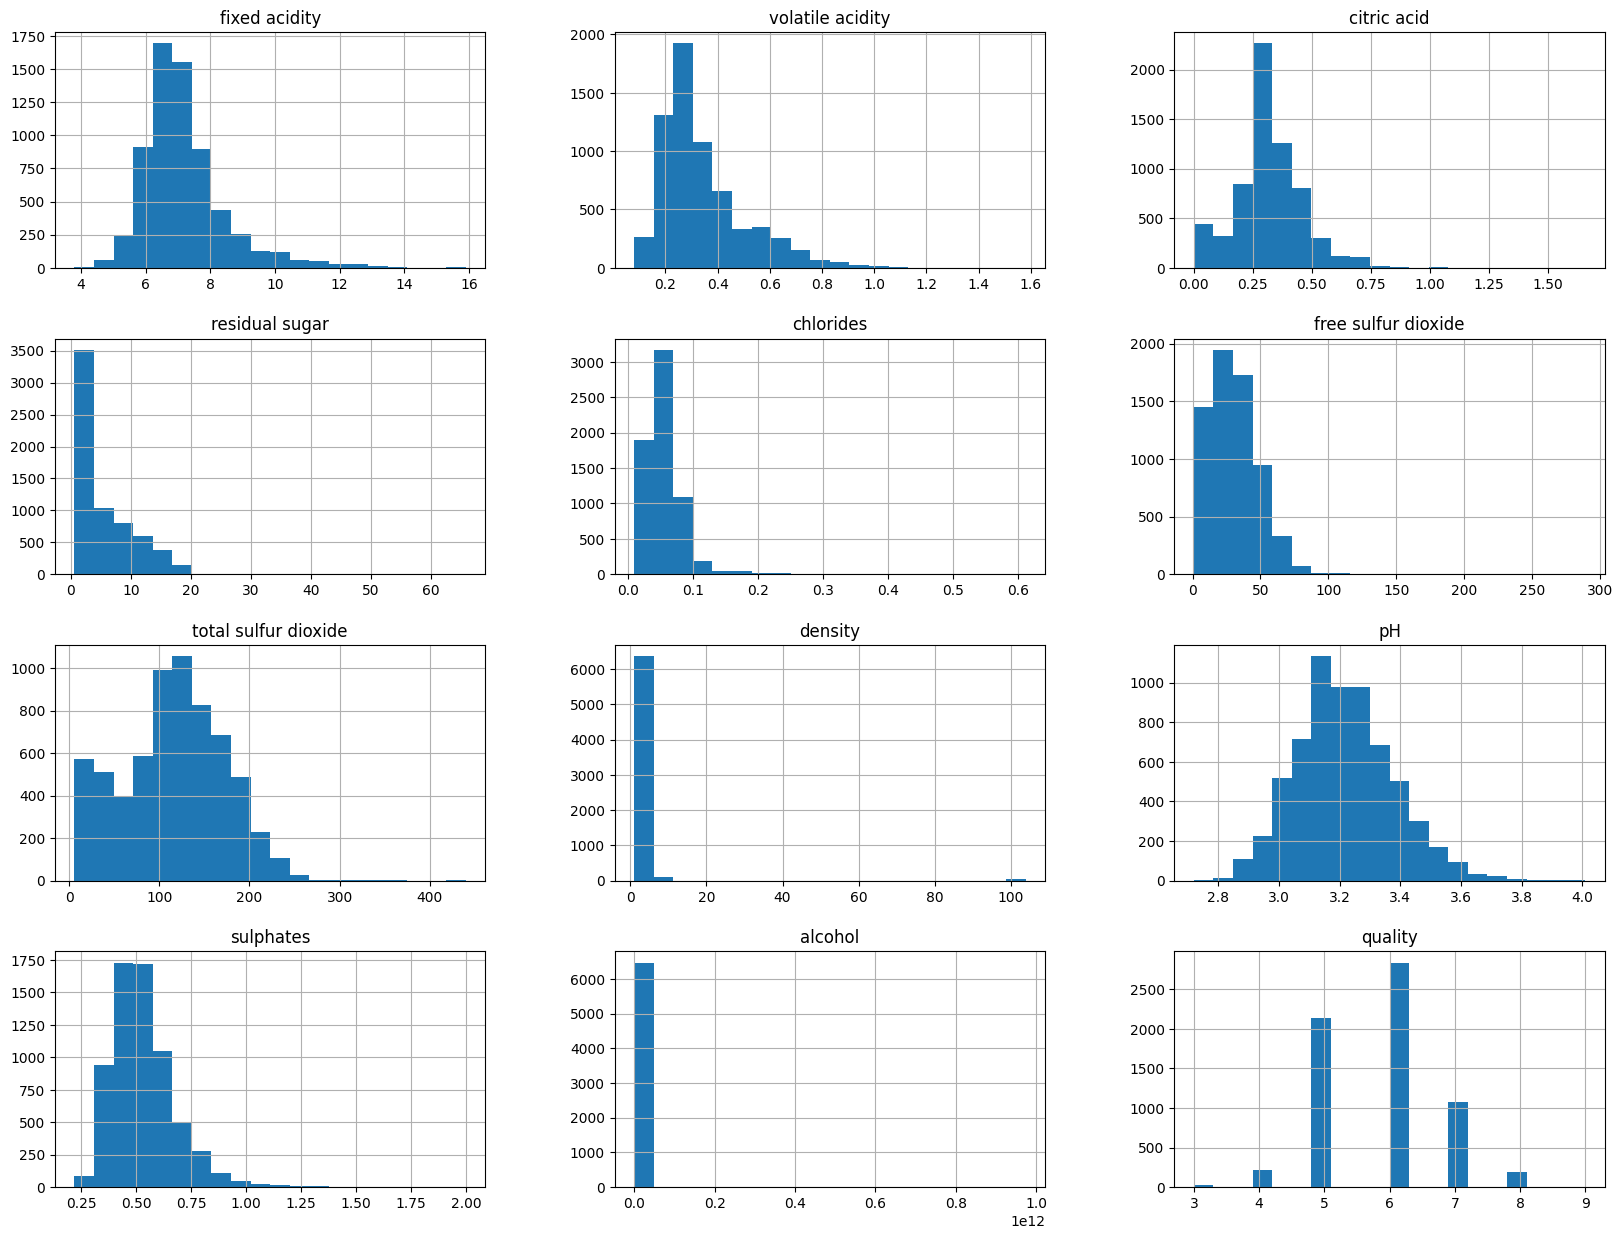

In [ ]:
import matplotlib.pyplot as plt
arquivo.hist(figsize=(20, 15), bins=20)
plt.show()

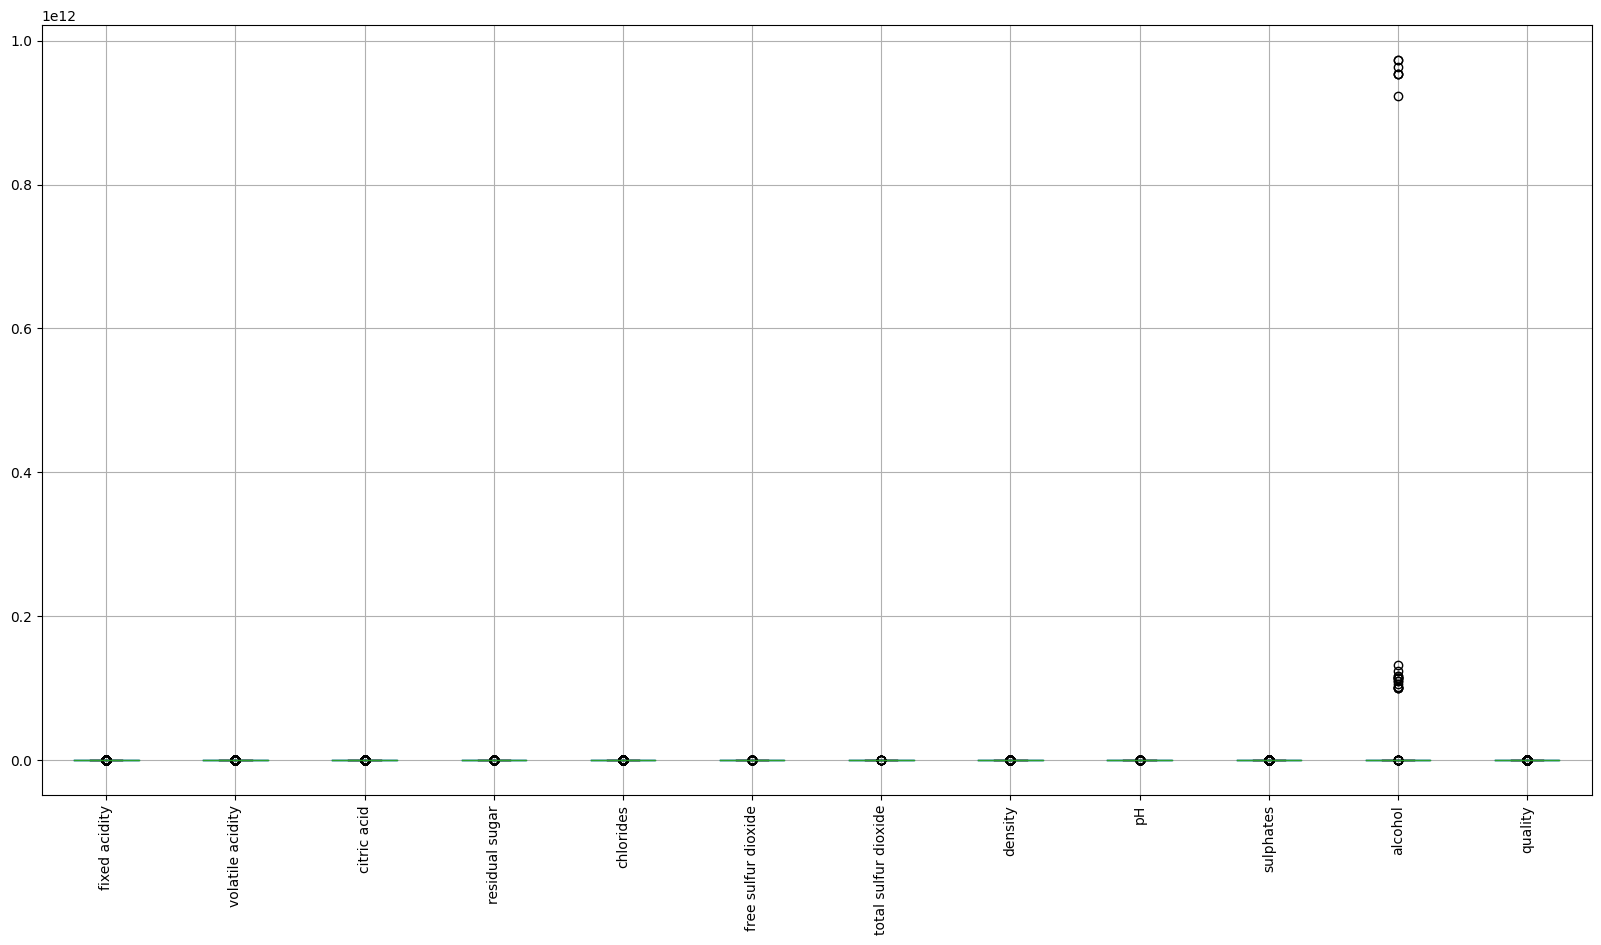

In [ ]:
arquivo.boxplot(figsize=(20, 10), rot=90)
plt.show()

In [ ]:
# Check if 'color column exists in the DataFrame
if 'color' in arquivo.columns:
    print("Column 'color' exists in the DataFrame.")
    # Replace 'red' with 0 and 'white' with 1
    arquivo['color'] = arquivo['color'].replace('red', 0)
    arquivo['color'] = arquivo['color'].replace('white', 1)
else:
    print("Column 'color' does not exist in the DataFrame.")

# Display the first few rows of the DataFrame
print(arquivo.head())

Column 'color' exists in the DataFrame.
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8       

In [ ]:
y = arquivo['quality']
X = arquivo.drop('quality', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming x is your feature set and y is the target variable
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
modelo = ExtraTreesRegressor()
modelo.fit(x_train, y_train)

ExtraTreesRegressor()

In [ ]:
resultado = modelo.score(x_test, y_test)
print ("Acurácia:", resultado)

Acurácia: 0.5558515648034348


In [ ]:
# Adicionando a verificação da Precisão, Recall e F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(x_test)

# Calculando as métricas
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisão:", precisao)
print("Recall:", recall)
print("F1-score:", f1)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

"""
Calculando e exibindo a matriz de confusão. A orientação padrão é a seguinte:
[0,0]: Verdadeiros Negativos (VN) - Previsões corretamente identificadas como negativas.
[0,1]: Falsos Positivos (FP) - Previsões incorretamente identificadas como positivas.
[1,0]: Falsos Negativos (FN) - Previsões incorretamente identificadas como negativas.
[1,1]: Verdadeiros Positivos (VP) - Previsões corretamente identificadas como positivas.
"""

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[304   4]
 [  2 990]]


In [ ]:
"""
Calculando e exibindo as métricas de classificação.
Se algumas classes têm muito mais amostras do que outras, isso pode influenciar o desempenho e confiabilidade do modelo.

O "support" refere-se à quantidade de ocorrências da classe específica no conjunto de dados, sendo útil para verificar desbalanceamentos.
A "macro avg" calcula a média aritmética das métricas (precisão, recall, F1-score) para cada classe, sem considerar o número de instâncias em cada classe (support).
A "weighted avg" calcula a média ponderada das métricas para cada classe, considerando o número de instâncias em cada classe (support).
"""
print("Relatório de Classsificação:")
print(classification_report(y_test, y_pred))

Relatório de Classsificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       308
           1       1.00      1.00      1.00       992

    accuracy                           1.00      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



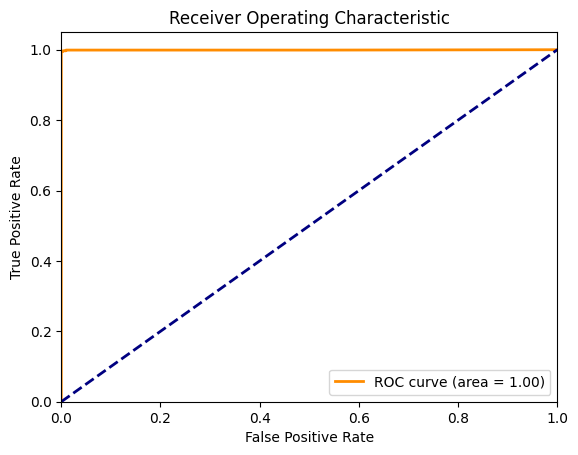

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prever as probabilidades para os dados de teste.
# Note que estamos interessados nas probabilidades da classe positiva (1), então usamos [:, 1].
y_probs = modelo.predict_proba(x_test)[:, 1]

# Calcular FPR, TPR, e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
